# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [27]:
# Libraries and functions

from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold



## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [24]:
# Loading the dataset

WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")



df = pd.read_csv(WHRDataSet_filename)

df.head(60)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,NaN,NaN,1.454051,0.546283,NaN,NaN,0.286599


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.


Missing Values:
country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean

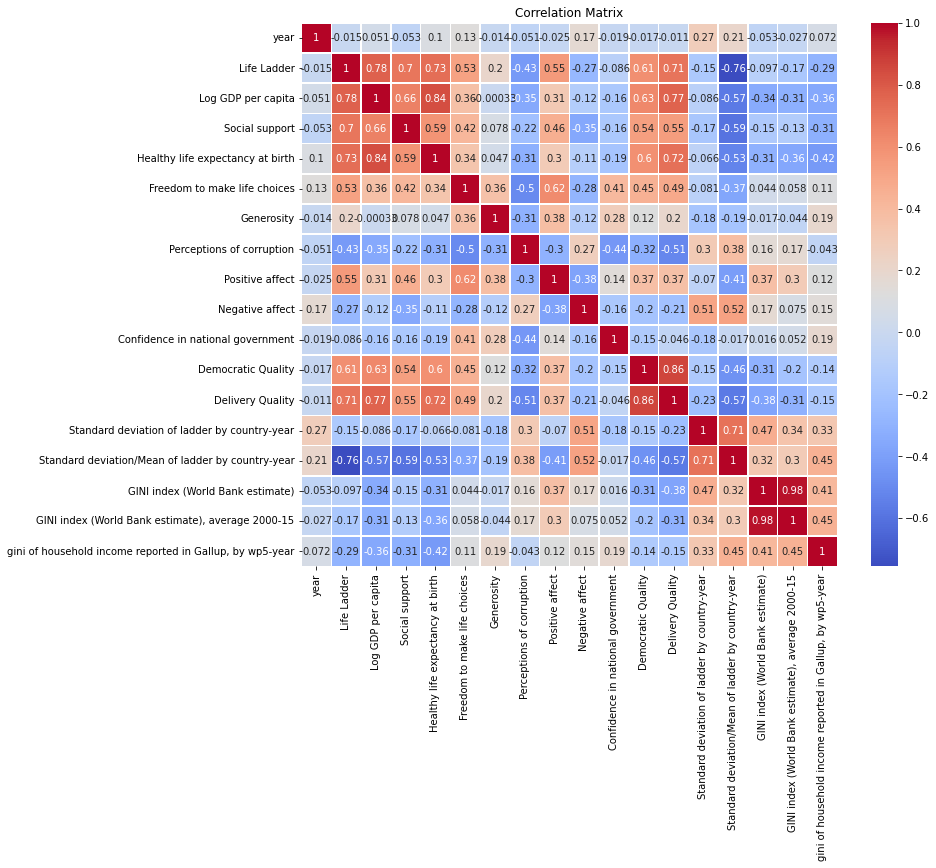

In [4]:
# Data inspection and identifying most correlated features

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


# Distribution of features
selected_features = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
                     'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
                     'Confidence in national government', 'Standard deviation of ladder by country-year']

   Log GDP per capita  Social support  Healthy life expectancy at birth  \
0            7.168690        0.450662                         49.209663   
1            7.333790        0.552308                         49.624432   
2            7.386629        0.539075                         50.008961   
3            7.415019        0.521104                         50.367298   
4            7.517126        0.520637                         50.709263   

   Democratic Quality  Delivery Quality  \
0           -1.929690         -1.655084   
1           -2.044093         -1.635025   
2           -1.991810         -1.617176   
3           -1.919018         -1.616221   
4           -1.842996         -1.404078   

   Standard deviation of ladder by country-year  Positive affect  \
0                                      1.774662         0.517637   
1                                      1.722688         0.583926   
2                                      1.878622         0.618265   
3                 

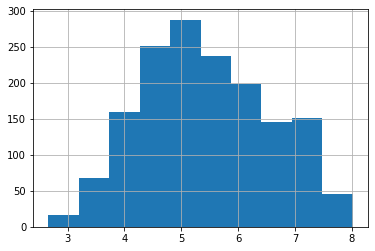

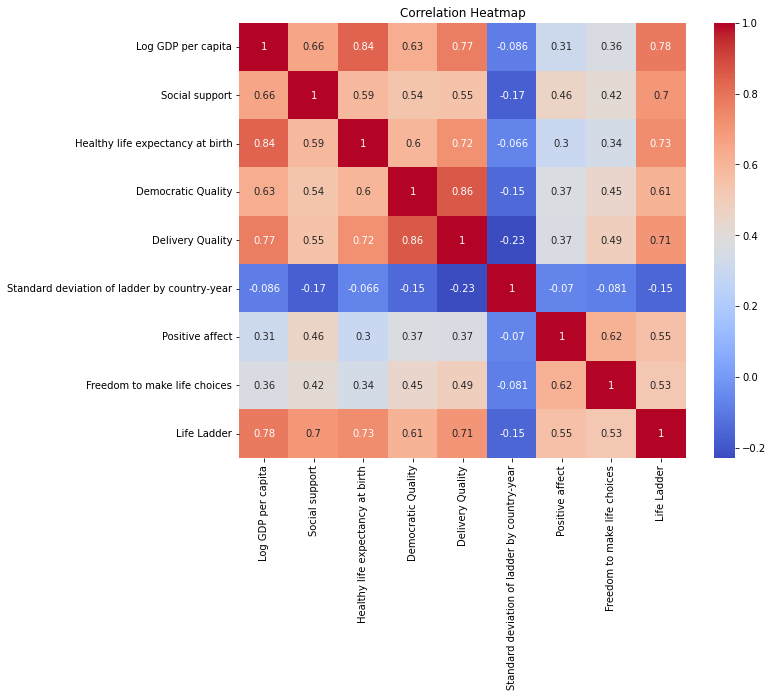

Log GDP per capita                              0
Social support                                  0
Healthy life expectancy at birth                0
Democratic Quality                              0
Delivery Quality                                0
Standard deviation of ladder by country-year    0
Positive affect                                 0
Freedom to make life choices                    0
Life Ladder                                     0
dtype: int64


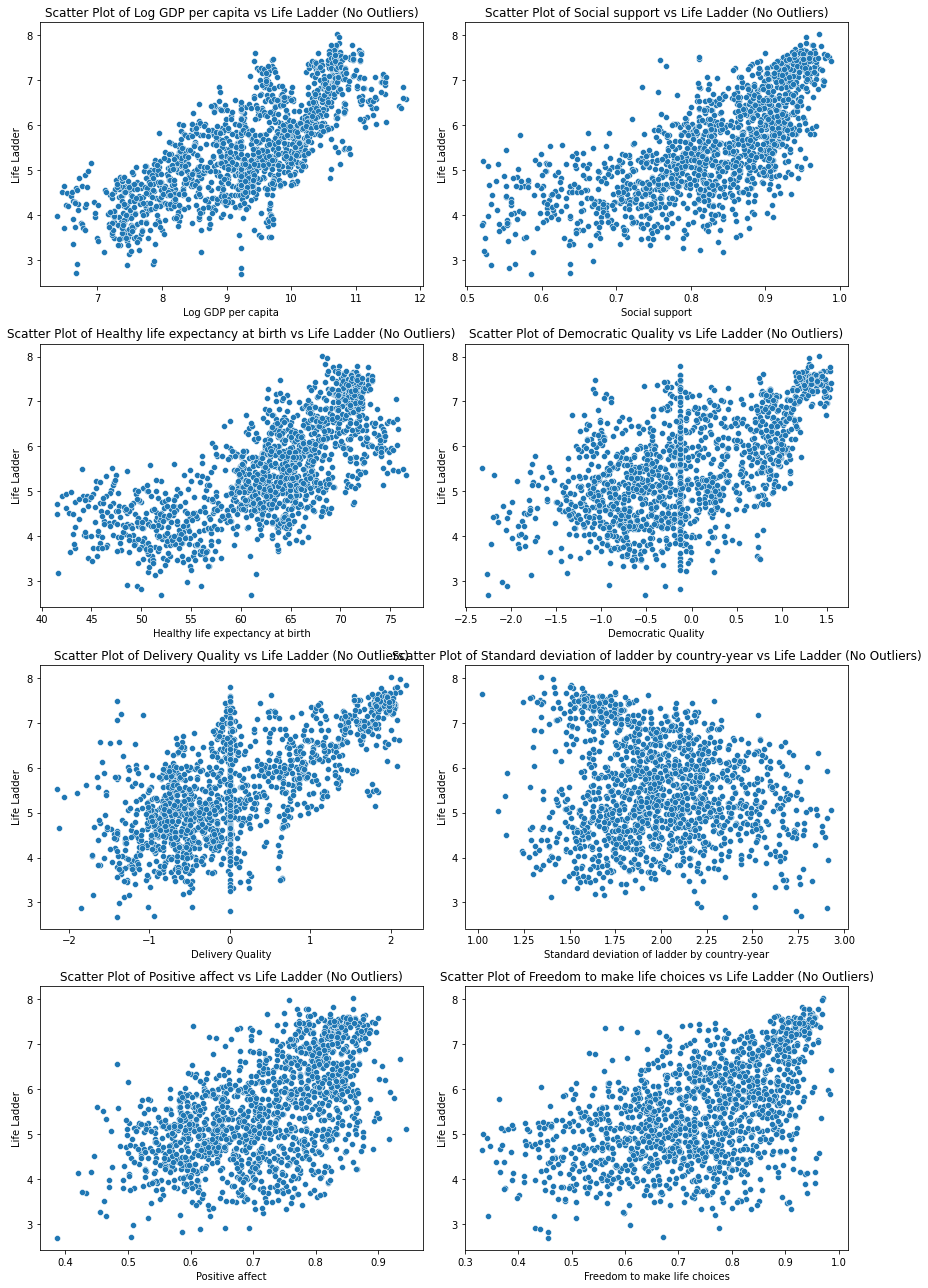

In [18]:
# 1st part of the project: using 8 most correlated features to predict the label 'life-ladder'

# Data preprocessing

# Selecting the 8 features and the label column
selected_features = [
    'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
    'Democratic Quality', 'Delivery Quality', 'Standard deviation of ladder by country-year',
    'Positive affect', 'Freedom to make life choices'
]
label_column = 'Life Ladder'

# Creating a new dataset with selected features and the label column
new_df = df[selected_features + [label_column]].copy()

# Inspecting the new dataset
print(new_df.head())
print(new_df.info())
print(new_df.describe())
print(new_df[label_column].hist())

# Correlation heatmap
correlation_matrix = new_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Handling missing values
new_df.fillna(new_df.mean(), inplace=True)  # Filling missing values with mean

# Verifying missing values have been handled
print(new_df.isnull().sum())

# Outlier removal

# Calculating the IQR for each selected feature
Q1 = new_df[selected_features].quantile(0.25)
Q3 = new_df[selected_features].quantile(0.75)
IQR = Q3 - Q1

# Defining a threshold for identifying outliers
outlier_threshold = 1.5

# Identifying outliers using the IQR method
outliers = ((new_df[selected_features] < (Q1 - outlier_threshold * IQR)) |
            (new_df[selected_features] > (Q3 + outlier_threshold * IQR)))

# Removing rows containing outliers
new_df_no_outliers = new_df[~outliers.any(axis=1)]

# Visualizing scatter plots for each feature against the label (Life Ladder)
plt.figure(figsize=(12, 18))
for i, feature in enumerate(selected_features):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(data=new_df_no_outliers, x=feature, y='Life Ladder')
    plt.title(f'Scatter Plot of {feature} vs Life Ladder (No Outliers)')
    plt.xlabel(feature)
    plt.ylabel('Life Ladder')
    plt.tight_layout()

plt.show()




## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [6]:
# Preprocessed dataset

new_df_no_outliers

,Log GDP per capita,Social support,Healthy life expectancy at birth,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Positive affect,Freedom to make life choices,Life Ladder
1,7.333790,0.552308,49.624432,-2.044093,-1.635025,1.722688,0.583926,0.678896,4.401778
2,7.386629,0.539075,50.008961,-1.991810,-1.617176,1.878622,0.618265,0.600127,4.758381
3,7.415019,0.521104,50.367298,-1.919018,-1.616221,1.785360,0.611387,0.495901,3.831719
4,7.517126,0.520637,50.709263,-1.842996,-1.404078,1.798283,0.710385,0.530935,3.782938
6,7.484583,0.525568,51.370525,-1.773257,-1.312503,1.395396,0.531691,0.508514,3.130896
...,...,...,...,...,...,...,...,...,...
1557,7.565154,0.799274,48.949745,-1.026085,-1.526321,1.964805,0.711885,0.575884,4.690188
1558,7.562753,0.765839,50.051235,-0.985267,-1.484067,2.079248,0.725214,0.642034,4.184451
1559,7.556052,0.735800,50.925652,-0.893078,-1.357514,2.198865,0.715079,0.667193,3.703191
1560,7.538829,0.768425,51.800068,-0.863044,-1.371214,2.776363,0.737636,0.732971,3.735400


In [7]:
# Building and training the model and performing GridSearch to find the best paarmeters

# Separating features and label
X = new_df_no_outliers[selected_features]
y = new_df_no_outliers['Life Ladder']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the hyperparameters and their possible values for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Building and training the Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=42)

# Initializing GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Getting the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluating the best model on the test set
mse_best = mean_squared_error(y_test, best_model.predict(X_test))  

print("Best Parameters:", best_params)
print("Best MSE:", mse_best)

# Feature importance analysis
feature_importances = best_model.feature_importances_
for feature, importance in zip(selected_features, feature_importances):
    print(f"{feature}: {importance:.4f}")

    
# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
average_mse = -np.mean(cv_scores)
print(f"Average MSE (Cross-Validation): {average_mse:.2f}")


Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Best MSE: 0.15381205142176693
Log GDP per capita: 0.4412
Social support: 0.0735
Healthy life expectancy at birth: 0.2625
Democratic Quality: 0.0311
Delivery Quality: 0.0225
Standard deviation of ladder by country-year: 0.0485
Positive affect: 0.0985
Freedom to make life choices: 0.0223
Average MSE (Cross-Validation): 0.29


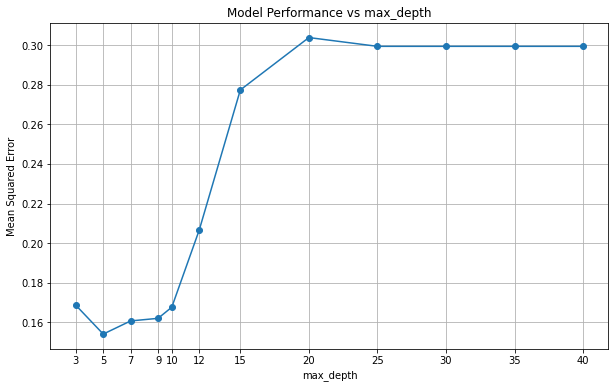

In [8]:
# Comparing the model's performance on different values of Max depth

# Defining the range of max_depth values to test
max_depth_values = [3, 5, 7, 9, 10, 12, 15, 20, 25, 30, 35, 40]

# List to store the MSE values for each max_depth
mse_scores = []

# Iterating through each max_depth value and compute the MSE
for max_depth in max_depth_values:
    model = GradientBoostingRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mse_scores, marker='o')
plt.title('Model Performance vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')
plt.xticks(max_depth_values)
plt.grid(True)
plt.show()

# Result is consistent with the value obtained from GridSearch 


In [9]:
# Building a new Random Forest model to compare the performance with the Gradient Boosting Regressor Model

# Separating features and label
X = new_df_no_outliers[selected_features]
y = new_df_no_outliers['Life Ladder']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the hyperparameters and their possible values for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 8, 15]
}

# Building and training the Random Forest Regressor model
model_rf = RandomForestRegressor(random_state=42)

# Initializing GridSearchCV with the model and parameter grid
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fitting the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Getting the best parameters and best estimator
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

# Evaluating the best model on the test set
mse_best_rf = mean_squared_error(y_test, best_model_rf.predict(X_test))

print("Best Parameters (Random Forest):", best_params_rf)
print("Best MSE (Random Forest):", mse_best_rf)


Best Parameters (Random Forest): {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 150}
Best MSE (Random Forest): 0.17902512625559144


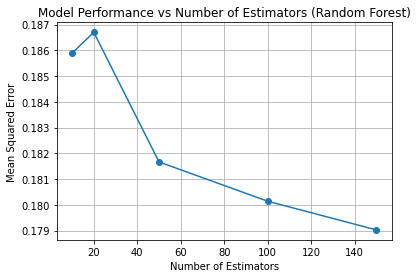

In [10]:
# Comparing the RF model's performance on different values of N_estimators

n_estimators_values = [10, 20, 50, 100, 150]
mse_values_rf = []

for n_estimators in n_estimators_values:
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=best_params_rf['max_depth'], 
                                   min_samples_split=best_params_rf['min_samples_split'], random_state=42)
    model.fit(X_train, y_train)
    mse = mean_squared_error(y_test, model.predict(X_test))
    mse_values_rf.append(mse)

plt.plot(n_estimators_values, mse_values_rf, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance vs Number of Estimators (Random Forest)')
plt.grid(True)
plt.show()


In [11]:
# Ensembling the GB and RF models

# Getting predictions from both models
predictions_gb = best_model.predict(X_test)
predictions_rf = best_model_rf.predict(X_test)

# Ensembling predictions with a simple average
predictions_ensemble = (predictions_gb + predictions_rf) / 2

# Calculating MSE for the ensemble predictions
mse_ensemble = mean_squared_error(y_test, predictions_ensemble)

print("MSE of Ensemble Model:", mse_ensemble)

# The ensembled model doesn't perform that differently than the individual models


MSE of Ensemble Model: 0.1530287887698084


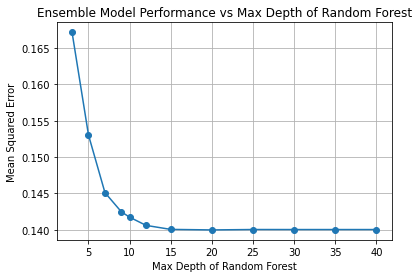

In [14]:
# Comparing the ensembled model's performance on different values of GB model's Max depth 

max_depth_values = [3, 5, 7, 9, 10, 12, 15, 20, 25, 30, 35, 40]
mse_values_ensemble = []

for max_depth in max_depth_values:
    model_rf = RandomForestRegressor(n_estimators=best_params_rf['n_estimators'], max_depth=max_depth, 
                                      min_samples_split=best_params_rf['min_samples_split'], random_state=42)
    model_rf.fit(X_train, y_train)
    predictions_gb = best_model.predict(X_test)
    predictions_rf = model_rf.predict(X_test)
    predictions_ensemble = (predictions_gb + predictions_rf) / 2
    mse_ensemble = mean_squared_error(y_test, predictions_ensemble)
    mse_values_ensemble.append(mse_ensemble)

plt.plot(max_depth_values, mse_values_ensemble, marker='o')
plt.xlabel('Max Depth of Random Forest')
plt.ylabel('Mean Squared Error')
plt.title('Ensemble Model Performance vs Max Depth of Random Forest')
plt.grid(True)
plt.show()

# We can see with a lower max depth value of 5, the GB model performs the best but it generates a higher MSE for the ensembled model


Log GDP per capita                              0
Social support                                  0
Healthy life expectancy at birth                0
Democratic Quality                              0
Delivery Quality                                0
Standard deviation of ladder by country-year    0
Positive affect                                 0
Freedom to make life choices                    0
Life Ladder                                     0
dtype: int64


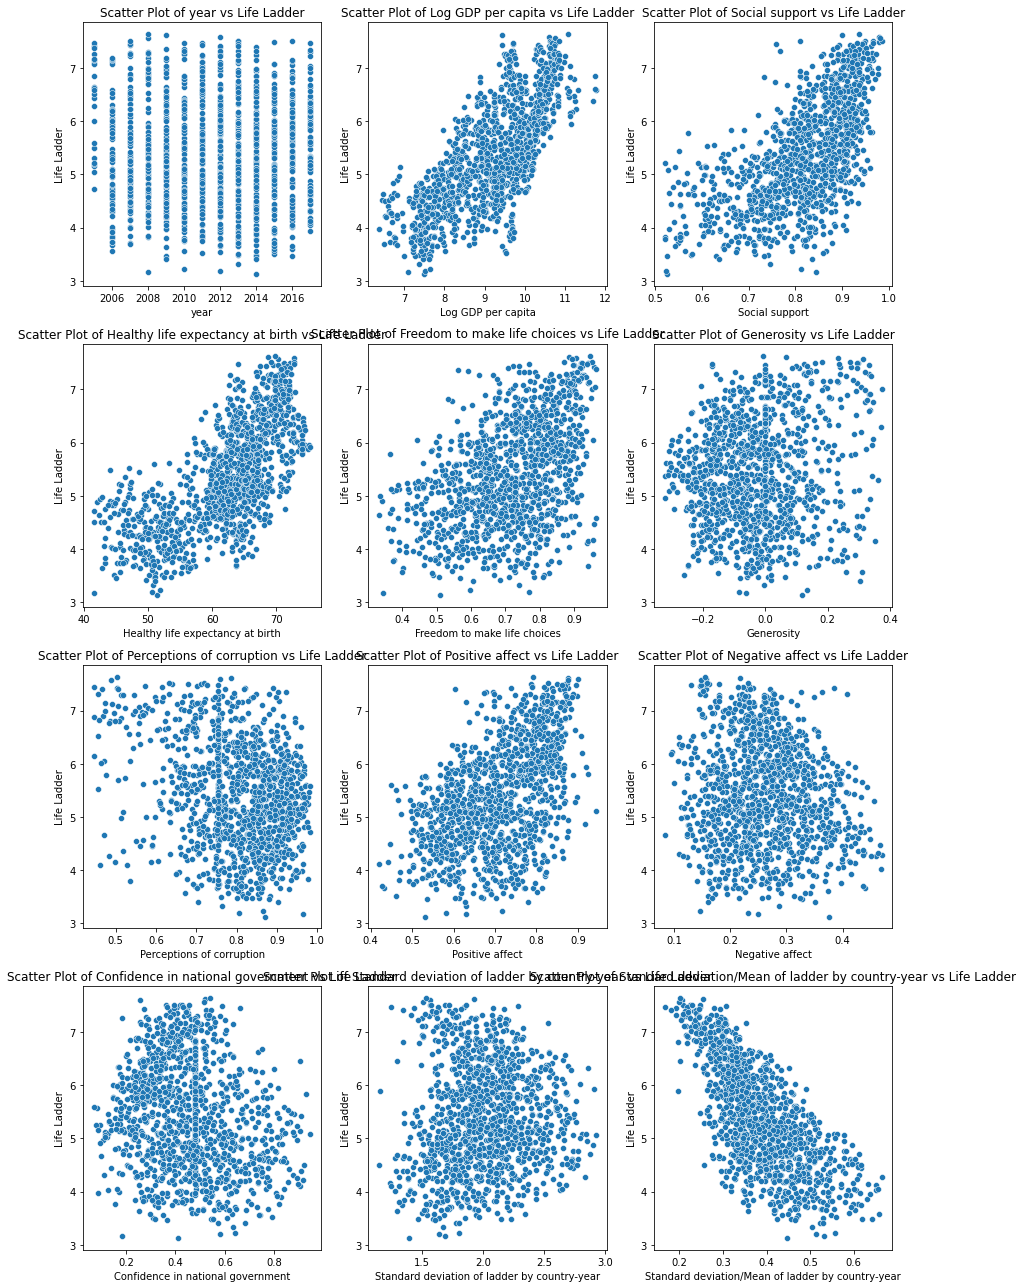

In [28]:
# 2nd part of the project: using 13 features (dropped the 5 features which had the most missing values) to predict life ladder using a feed-forward neural network

# Selecting the necessary features and the label
selected_features = [
    'year', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect',
    'Negative affect', 'Confidence in national government', 'Standard deviation of ladder by country-year',
    'Standard deviation/Mean of ladder by country-year'
]

# Creating the new dataset with selected features and the label
new_df_original = df[selected_features + ['Life Ladder']].copy() # To note, I never permanenetly dropped the columns from the original dataset for the 1st part of the project as I am needing these columns now

# Handling missing values by imputing with mean
new_df_original.fillna(new_df_original.mean(), inplace=True)

# Verifying missing values have been handled
print(new_df.isnull().sum())

# Detecting and addressing outliers using IQR method
Q1 = new_df_original.quantile(0.25)
Q3 = new_df_original.quantile(0.75)
IQR = Q3 - Q1
new_df_original = new_df_original[~((new_df_original < (Q1 - 1.5 * IQR)) | (new_df_original > (Q3 + 1.5 * IQR))).any(axis=1)]

# Visualizing scatter plots for each feature against the label (Life Ladder)
plt.figure(figsize=(12, 18))
for i, feature in enumerate(selected_features):
    plt.subplot(4, 3, i+1)
    sns.scatterplot(data=new_df_original, x=feature, y='Life Ladder')
    plt.title(f'Scatter Plot of {feature} vs Life Ladder')
    plt.xlabel(feature)
    plt.ylabel('Life Ladder')
    plt.tight_layout()

plt.show()


In [26]:
# Defining the number of folds for cross-validation
num_folds = 5

# Initializing lists to store MSE scores for each fold
mse_scores_nn = []

# Performing cross-validation using KFold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
for train_idx, val_idx in kf.split(X_nn):
    X_train_fold, X_val_fold = X_nn.iloc[train_idx], X_nn.iloc[val_idx]
    y_train_fold, y_val_fold = y_nn.iloc[train_idx], y_nn.iloc[val_idx]
    
    # Standardizing features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_fold)
    X_val_scaled = scaler.transform(X_val_fold)
    
    # Building the neural network model
    model_nn = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer
    ])
    
    # Compiling the model
    model_nn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    # Training the model
    model_nn.fit(X_train_scaled, y_train_fold, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val_fold))
    
    # Evaluating the model on the validation set
    y_pred_val = model_nn.predict(X_val_scaled)
    mse_fold = mean_squared_error(y_val_fold, y_pred_val)
    mse_scores_nn.append(mse_fold)

# Calculating the average MSE from cross-validation
average_mse_nn = np.mean(mse_scores_nn)
print(f"Average MSE (Cross-Validation - Neural Network): {average_mse_nn:.2f}")


# With the NN model the MSE score came down to 0.04, which is pretty good and acceptable.


Epoch 1/50
32/32 [==============================] - 1s 5ms/step - loss: 22.7415 - val_loss: 13.0718
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 6.9037 - val_loss: 2.3152
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 1.7023 - val_loss: 1.2690
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 1.1297 - val_loss: 1.0493
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.9126 - val_loss: 0.9097
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7713 - val_loss: 0.7997
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6630 - val_loss: 0.7108
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5800 - val_loss: 0.6347
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5159 - val_loss: 0.5692
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4644 - val_loss: 0.5168
Epoch 11/50
32/32

Epoch 34/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0678 - val_loss: 0.0946
Epoch 35/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0617 - val_loss: 0.0894
Epoch 36/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0578 - val_loss: 0.0832
Epoch 37/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0532 - val_loss: 0.0791
Epoch 38/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0487 - val_loss: 0.0729
Epoch 39/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0446 - val_loss: 0.0687
Epoch 40/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0418 - val_loss: 0.0651
Epoch 41/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0604
Epoch 42/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0349 - val_loss: 0.0569
Epoch 43/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0326 - val_loss: 0.0543
Epoch 44/5

Epoch 17/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2498 - val_loss: 0.3048
Epoch 18/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2353 - val_loss: 0.2885
Epoch 19/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2207 - val_loss: 0.2725
Epoch 20/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2099 - val_loss: 0.2611
Epoch 21/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1968 - val_loss: 0.2438
Epoch 22/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1887 - val_loss: 0.2366
Epoch 23/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1764 - val_loss: 0.2254
Epoch 24/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1678 - val_loss: 0.2206
Epoch 25/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1588 - val_loss: 0.2005
Epoch 26/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1494 - val_loss: 0.1947
Epoch 27/5

Epoch 50/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0210 - val_loss: 0.0456
Average MSE (Cross-Validation - Neural Network): 0.04
